In [1]:
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn import metrics
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import graphviz
import pydot

In [2]:
df = pd.read_csv('data.csv', index_col=0)
df.drop('Unnamed: 32', axis=1, inplace=True)

In [3]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
target = 'diagnosis'
cols = df.columns[df.columns != 'diagnosis']

In [5]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(df[cols], 
                                                                    df[target],
                                                                    test_size=.3)

In [40]:
tree_classifier = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=23)

tree_classifier = tree_classifier.fit(train_x, train_y)

rf = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_leaf=1)

rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
print(accuracy_score(test_y, tree_classifier.predict(test_x)))

0.9298245614035088


In [23]:
dot_data = tree.export_graphviz(tree_classifier, out_file=None) 

graph = graphviz.Source(dot_data) 
graph.render("treecls") 

'treecls.pdf'

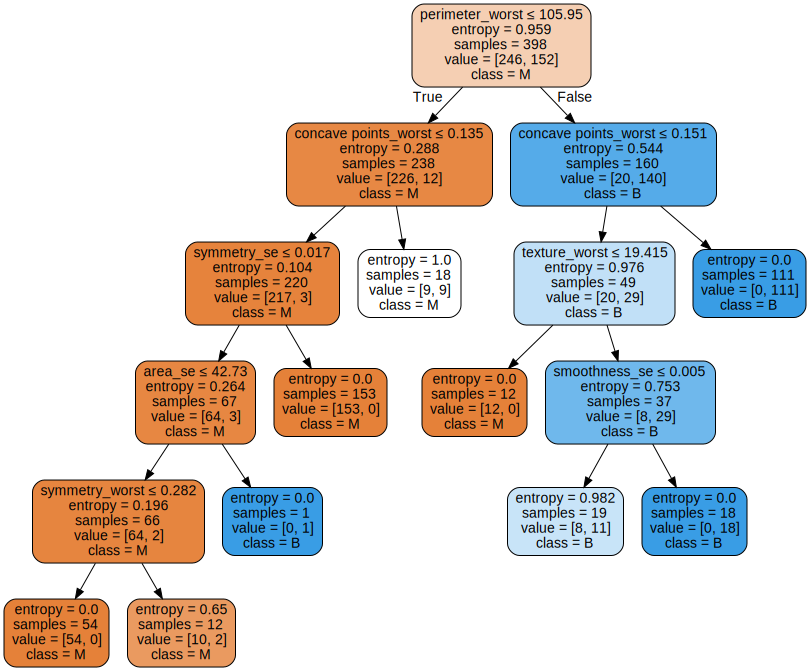

In [25]:
dot_data = tree.export_graphviz(tree_classifier, out_file=None, 
                     feature_names=df[cols].columns,  
                     class_names=df[target].unique(),  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


cm = confusion_matrix(test_y, tree_classifier.predict(test_x))
# True Positives
TP = cm[1, 1]

# True Negatives
TN = cm[0, 0]

# False Positives
FP = cm[0, 1]

# False Negatives
FN = cm[1, 0]

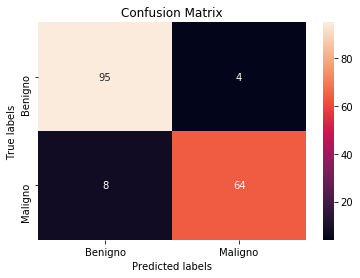

In [11]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Benigno', 'Maligno'])
ax.yaxis.set_ticklabels(['Benigno', 'Maligno'])
plt.savefig('breastconfusionmatrix.jpg')

In [41]:
dot_data = tree.export_graphviz(rf.estimators_[0], out_file=None) 

graph = graphviz.Source(dot_data) 
#graph.render("treecls") 

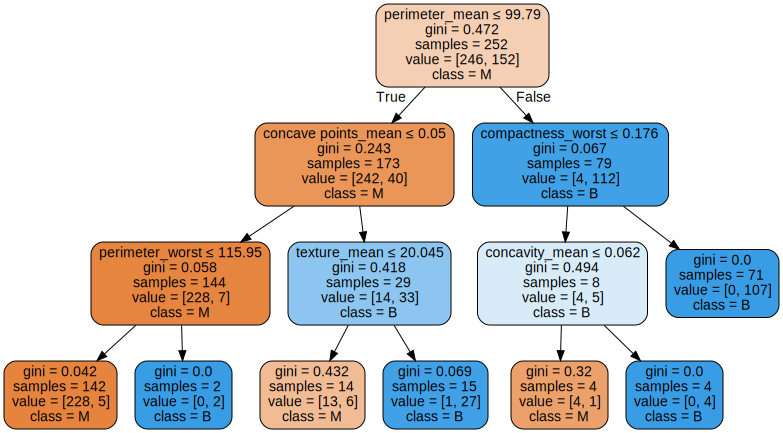

In [42]:
dot_data = tree.export_graphviz(rf.estimators_[98], out_file=None, 
                     feature_names=df[cols].columns,  
                     class_names=df[target].unique(),  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 